## Machine Learning Develop

In [1]:
import pandas as pd

df = pd.read_csv("/media/tr4shhh/Tr4Shhh_FOLDER/Proyects/4geeks/24-Natural_Laguage_processing/natural_language_processing/data/interim/url_spam_without_duplicates.csv")

df


,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2364,https://www.theverge.com/2020/6/29/21306889/di...,False
2365,https://www.smartcitiesworld.net/news/news/dee...,False
2366,https://techcrunch.com/2019/07/04/an-optimisti...,False
2367,https://www.technologyreview.com/2019/12/20/13...,False


I factorize the column

In [2]:
# Aplicar pd.factorize() a la columna 'Categorica'
df['is_spam'], category_mapping = pd.factorize(df['is_spam'])

# Imprimir el diccionario de mapeo
print("\nDiccionario de mapeo de categorías a números:")
print(category_mapping)

# Imprimir el DataFrame resultante
print("DataFrame con variable categórica convertida a numérica:")
df


Diccionario de mapeo de categorías a números:
Index([True, False], dtype='bool')
DataFrame con variable categórica convertida a numérica:


,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,0
1,https://www.hvper.com/,0
2,https://briefingday.com/m/v4n3i4f3,0
3,https://briefingday.com/n/20200618/m#commentform,1
4,https://briefingday.com/fan,0
...,...,...
2364,https://www.theverge.com/2020/6/29/21306889/di...,1
2365,https://www.smartcitiesworld.net/news/news/dee...,1
2366,https://techcrunch.com/2019/07/04/an-optimisti...,1
2367,https://www.technologyreview.com/2019/12/20/13...,1


process the text


In [3]:
import regex as re

def preprocess_text(text):
    
    # Elimino los caracteres que no son una letra o espacio en blanco
    text = re.sub(r'[^a-z ]', " ", text)
    
    # Elimino espacios en blanco
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    # Convierto multiples espacios en blanco en uno
    text = re.sub(r'\s+', " ", text.lower())

    # Eliminar tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

df["url"] = df["url"].apply(preprocess_text)


df

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",0
1,"[https, www, hvper, com]",0
2,"[https, briefingday, com, v, i]",0
3,"[https, briefingday, com, m, commentform]",1
4,"[https, briefingday, com, fan]",0
...,...,...
2364,"[https, www, theverge, com, disney, deepfake, ...",1
2365,"[https, www, smartcitiesworld, net, news, news...",1
2366,"[https, techcrunch, com, an, optimistic, view,...",1
2367,"[https, www, technologyreview, com, this, star...",1


I lematize the text and erase the stopwords 

In [4]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

df["url"] = df["url"].apply(lemmatize_text)

df

[nltk_data] Downloading package wordnet to /home/tr4shhh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tr4shhh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[http, briefingday, list, manage, unsubscribe]",0
1,"[http, hvper]",0
2,"[http, briefingday]",0
3,"[http, briefingday, commentform]",1
4,"[http, briefingday]",0
...,...,...
2364,"[http, theverge, disney, deepfake, face, swapp...",1
2365,"[http, smartcitiesworld, news, news, deepfake,...",1
2366,"[http, techcrunch, optimistic, view, deepfakes]",1
2367,"[http, technologyreview, startup, claim, deepf...",1


I create a wordcloud

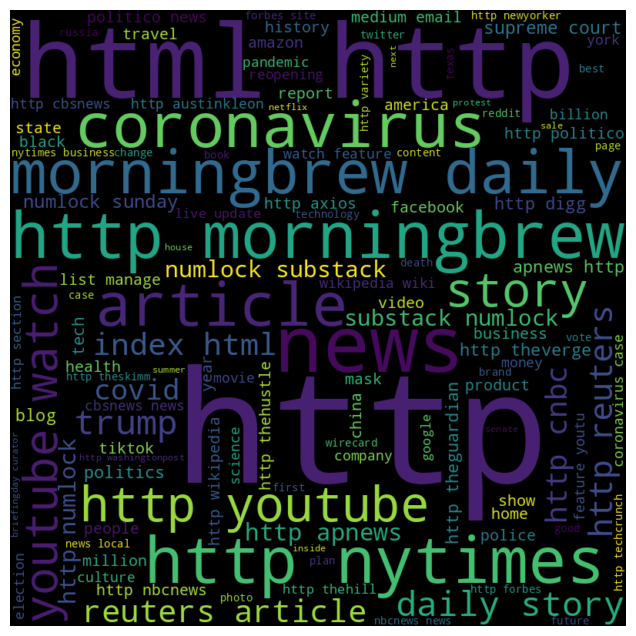

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convertir la columna "url" a una cadena única
text = ' '.join(df["url"].astype(str))

# Limpiar el texto de caracteres no alfabéticos y convertir a minúsculas
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

# Crear la nube de palabras
wordcloud = WordCloud(width=800, 
                      height=800, 
                      background_color="black", 
                      max_words=100000, 
                      min_font_size=12, 
                      random_state=42,
                      repeat= False,
                      stopwords="generate_from_frequencies",
                      collocations=True).generate(cleaned_text)

# Configurar la figura y mostrar la nube de palabras
fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

i count the words

In [25]:
from collections import Counter
import re

def contar_palabras(texto, n=10):
    # Convertir el texto a minúsculas y eliminar caracteres no alfabéticos
    texto = re.sub(r'[^a-zA-Z\s]', '', texto.lower())
    
    # Dividir el texto en palabras
    palabras = texto.split()

    # Contar la frecuencia de cada palabra
    conteo_palabras = Counter(palabras)

    # Mostrar las n palabras más repetidas
    palabras_mas_comunes = conteo_palabras.most_common(n)

    # Imprimir resultados
    print(f"Las {n} palabras más repetidas son:")
    for palabra, frecuencia in palabras_mas_comunes:
        print(f"{palabra}: {frecuencia}")


In [26]:
contar_palabras(cleaned_text, 10)

Las 10 palabras más repetidas son:
http: 2369
html: 296
news: 273
story: 199
article: 189
coronavirus: 170
morningbrew: 105
nytimes: 101
daily: 99
trump: 89


I convert the text into numbers

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = df["url"]
tokens_list = [" ".join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = df["is_spam"]

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

split train-test

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [49]:
from sklearn.svm import SVC

model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [50]:
y_pred = model.predict(X_test)
y_pred


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9514767932489452

I save the model

In [52]:
import pickle

#Cambiar el objeto por el que queramos guardar
objeto = model

ruta_guardado = '../models/modelo.pkl'

with open(ruta_guardado, "wb") as archivo:
    pickle.dump(objeto, archivo)